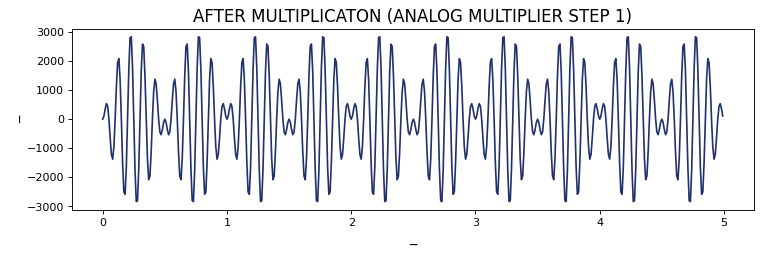

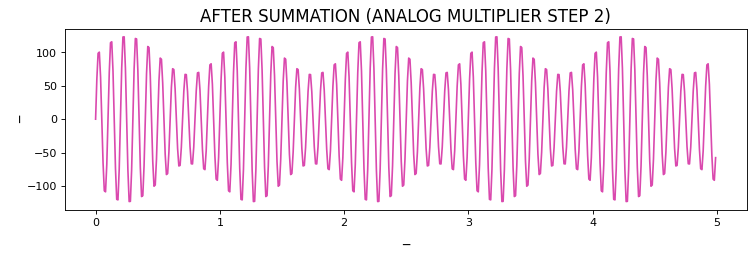

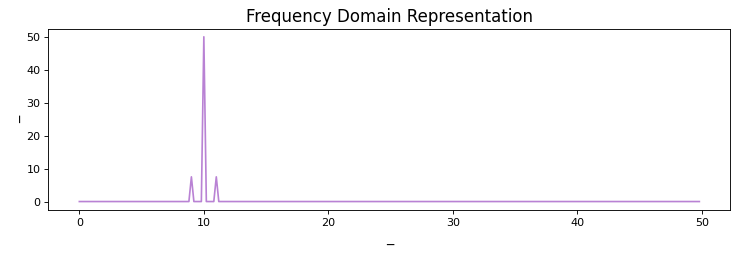

In [96]:
# importing required libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Amplitude_Modulation_class
class Amplitude_Modulation:
    def __init__(self,message_angular_freq=1,carrier_angular_freq=10,
                 message_amplitude=30,carrier_amplitude=100,
                 time_start=0,time_end=5,
                 message_phase=0,carrier_phase=0,
                 message_signal="sin",carrier_signal="sin",samplingFrequency=100):
        
        self.message_angular_freq=message_angular_freq
        self.carrier_angular_freq=carrier_angular_freq
        
        self.message_amplitude=message_amplitude
        self.carrier_amplitude=carrier_amplitude
        
        self.samplingFrequency=samplingFrequency
        
        self.time_start=time_start
        self.time_end=time_end
        self.time=np.arange(self.time_start,self.time_end,1/samplingFrequency)
        
        self.message_phase=message_phase
        self.carrier_phase=carrier_phase
        
        #creating message_signal
        if message_signal=="sin":
            self.message_signal=self.message_amplitude*np.sin((2*np.pi*self.message_angular_freq*self.time)+self.message_phase)
        elif message_signal=="cos":
            self.message_signal=self.message_amplitude*np.cos(2*np.pi*self.message_angular_freq*self.time+self.message_phase)
        else:
            print("INVALID MESSAGE SIGNAL *****ERROR*******")
            return
        
        #Creating carrier_signal
        if carrier_signal=="sin":
            self.carrier_signal=self.carrier_amplitude*np.sin(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
        elif message_signal=="cos":
            self.carrier_signal=self.carrier_amplitude*np.cos(2*np.pi*self.carrier_angular_freq*self.time+self.carrier_phase)
        else:
            print("INVALID CARRIER SIGNAL *******ERROR******")
            return
        #Creating Amplitude modulated signal
        self.modulated_signal=None
    def get_modulated_signal(self):
       
        return self.modulated_signal
    def get_carrier_signal(self):
        return self.carrier_signal
    def get_message_signal(self):
        return self.message_signal
    def get_time(self):
        return self.time
    
    def analog_multiplier(self):
        
        # message_signal is multiplied with carrier signal and
        # this output is added to the carrier signal hence we generated 
        # Amplitude modulated signal with analog multiplier method
        
        message_signal_X_carrier_siganl=self.carrier_signal*self.message_signal
        self.plot(self.time,message_signal_X_carrier_siganl,title="AFTER MULTIPLICATON (ANALOG MULTIPLIER STEP 1)")
        
        self.modulated_signal=self.carrier_signal+(1/self.carrier_amplitude)*message_signal_X_carrier_siganl
        self.plot(self.time,self.modulated_signal,title="AFTER SUMMATION (ANALOG MULTIPLIER STEP 2)")
        
    def square_law_modulator(self,a=1,b=0.5,c=0.1,d=0.01):
    #message signal and carrier signal are added
        Vin=self.message_signal+self.carrier_signal
        
        self.plot(self.time,Vin,title="AFTER SUMMATION OF MESSAGE AND CARRIER SIGNAL --(SQUARE LAW MODULATOR STEP 1)")
              
        ## after Vin passed through Non_linear Device
        ## here after passing through non linear device ouput looks like
        ## a*(m+c)^2+b*(m+c)^3+c*(m+c)^4........
        ## this contains so many range of frequencies since there are
        ## m*m , c*c , m*c 
        Vo=a*Vin+b*(Vin)*(Vin)+c*Vin*Vin*Vin+d*Vin*Vin*Vin*Vin
        
        
        self.plot(self.time,Vo,title="AFTER PASSING THROUGH NON LINEAR DEVICE(DIODE) --(SQUARE LAW MODULATOR STEP 2)")

        ## now passing Vo through band pass filter
        ## we filter out the frequencies which are not needed using Band Pass Filter
        
        Vo= a*self.carrier_signal*(1+(2*b/a)/(self.carrier_amplitude)*self.message_signal)
        self.plot(self.time,Vo,title="AFTER PASSING THROUGH BAND PASS FILTER --(SQUARE LAW MODULATOR STEP 3)")
        
    def plot(self,x_value,y_value,title="TITLE",x_value_2=None,y_value_2=None,
             x_label="_",y_label="_"):
        figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
        if x_value_2==None and y_value_2==None:
            plt.plot(x_value,y_value,c=np.random.rand(3,))
            plt.title(title,size=15)
            plt.xlabel(x_label,size=13)
            plt.ylabel(y_label,size=13)
            plt.show()
        else:
            plt.plot(x_value,y_value,color="pink")
            plt.plot(x_value_2,y_value_2,color="b")
            plt.show()
            
    #funcion to perform the fourier of the given signal
    def fourier_trainsfrom(self,signal):
        amplitude=signal
       
        # Frequency domain representation
        samplingFrequency=self.samplingFrequency
        fourierTransform = np.fft.fft(amplitude)/len(amplitude)           # Normalize amplitude

        fourierTransform = fourierTransform[range(int(len(amplitude)/2))] # Exclude sampling frequency

        tpCount     = len(amplitude)

        values      = np.arange(int(tpCount/2))

        timePeriod  = tpCount/samplingFrequency

        frequencies = values/timePeriod

        # Frequency domain representation

        self.plot(frequencies, abs(fourierTransform),title="Frequency Domain Representation")


ac=Amplitude_Modulation()
ac.time
# ac.plot(ac.get_time(),ac.get_message_signal(),"Message Signal",x_label="time",y_label="Amplitude")
# ac.plot(ac.get_time(),ac.get_carrier_signal(),"Carrier Wave",x_label="time",y_label="Amplitude")
# ac.analog_multiplier()
i=0
ac.analog_multiplier()
# ac.square_law_modulator()
ac.fourier_trainsfrom(ac.get_modulated_signal())